# 1.

#### 1:  AdaBoost, minimiza a função de perda exponencial que pode tornar o algoritmo sensível aos outliers. Com Gradient Boosting, qualquer função de perda diferenciável pode ser utilizada. O algoritmo Gradient Boosting é mais robusto para valores discrepantes do que AdaBoost.
#### 2: AdaBoost é o primeiro algoritmo de boost projetado com uma função de perda específica. Por outro lado, Gradient Boosting é um algoritmo genérico que auxilia na busca de soluções aproximadas para o problema de modelagem aditiva. Isso torna o Gradient Boosting mais flexível que o AdaBoost.
#### 3: AdaBoost minimiza a função de perda relacionada a qualquer erro de classificação e é melhor usado com learners fracos. O método foi projetado principalmente para problemas de classificação binária e pode ser utilizado para aumentar o desempenho de árvores de decisão. Gradient Boosting é usado para resolver o problema da função de perda diferenciável. A técnica pode ser usada tanto para problemas de classificação quanto de regressão.
#### 4: No caso do Gradient Boosting, as deficiências dos learners fracos existentes podem ser identificadas por gradientes e com o AdaBoost, podem ser identificadas por pontos de dados de alto peso.
#### 5:  No caso do AdaBoost, a mudança é feita através da ponderação de observações que foram classificadas incorretamente antes, enquanto o Gradient Boosting identifica as observações difíceis por grandes resíduos calculados nas iterações anteriores.

# 2.

## Classificação

In [2]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

## Regressão

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error'
).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

The mean squared error (MSE) on test set: 3004.4471


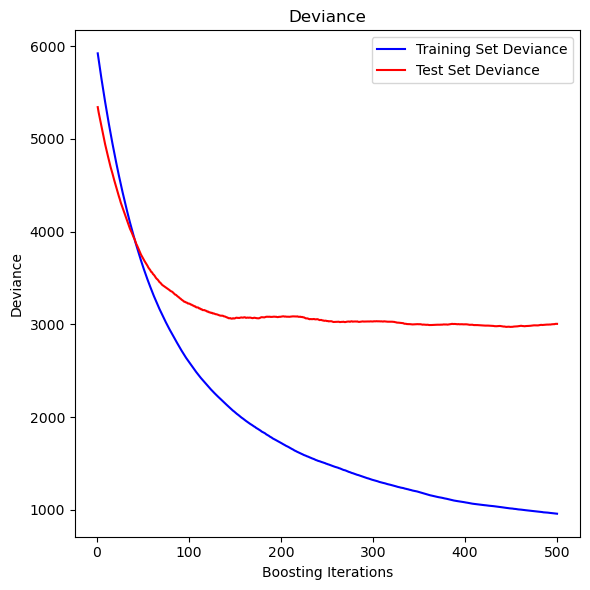

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##Carregar os dados
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

##Pré-processamento de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

##Modelo de regressão de ajuste
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

##Desvio de treinamento de enredo
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

# 3.

#### 1: n_estimators int, padrão=100 O número de estágios de reforço a realizar. Aumento de gradiente é bastante robusto para over-fitting por isso um grande número geralmente resulta em melhor desempenho. Os valores devem estar no intervalo .

#### 2: learning_rate float, padrão=0,1 A taxa de aprendizagem diminui a contribuição de cada árvore em . Há um trade-off entre learning_rate e n_estimators. Os valores devem estar no intervalo .

#### 3: max_depth int ou Nenhum, padrão=3 Profundidade máxima dos estimadores de regressão individuais. O máximo A profundidade limita o número de nós na árvore. Ajustar este parâmetro para melhor desempenho; o melhor valor depende da interação das variáveis de entrada. Se Nenhum, os nós serão expandidos até todas as folhas são puras ou até que todas as folhas contenham menos de min_samples_split amostras. Se int, os valores devem estar no intervalo .

#### 4: random_state int, instância RandomState ou None, default=None Controla a semente aleatória dada a cada estimador de árvore em cada impulsionando a iteração. Além disso, controla a permutação aleatória dos recursos em cada divisão (consulte Notas para obter mais detalhes). Ele também controla a divisão aleatória dos dados de treinamento para obter um conjunto de validação se não for Nenhum. Passe um int para saída reproduzível em várias chamadas de função.

#### 5: loss{'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error' Função de perda a ser otimizada. 'squared_error' refere-se ao quadrado erro para regressão. «absolute_error» refere-se ao erro absoluto de regressão e é uma função de perda robusta. 'Huber' é um combinação dos dois. 'quantil' permite regressão quantílica (use para especificar o quantil).

# 4.

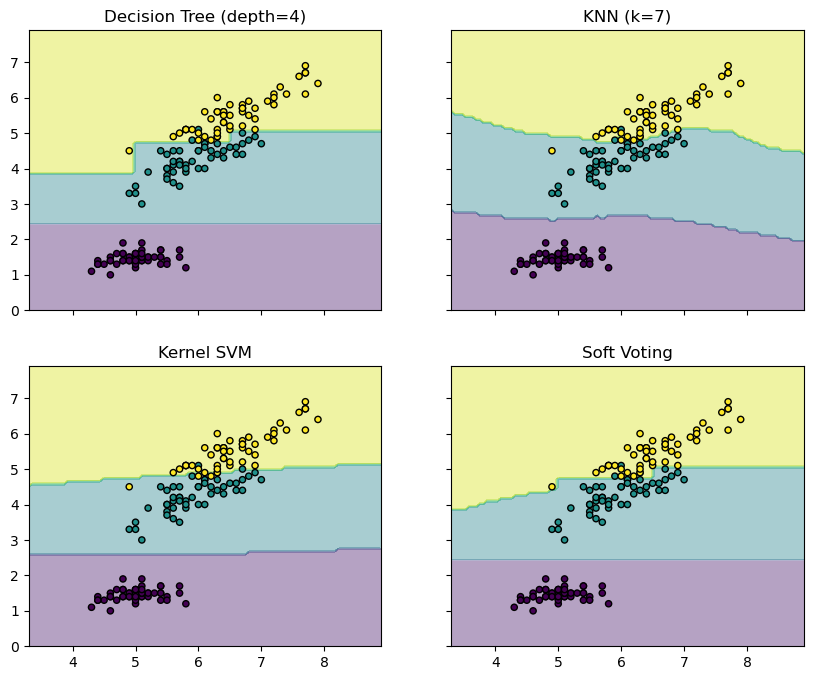

In [4]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# 5.

#### O nome "Stochastic" no StochasticGBM refere-se ao fato de que o algoritmo utiliza uma amostra aleatória dos dados de treinamento para ajustar cada árvore de decisão. Isso é diferente do GBM convencional, que utiliza todos os dados de treinamento para ajustar cada árvore de decisão. Portanto, a principal diferença entre os dois algoritmos é que o StochasticGBM introduz um elemento de aleatoriedade no processo de ajuste das árvores de decisão, o que pode tornar o modelo mais robusto e menos propenso a overfitting.